## What is DSBC?

DSBC stands for **Data Science task Benchmarking for code**, a benchmark suite and dataset designed to evaluate how well large language models (LLMs) and data-science agents handle realistic data science problems.

What Is **dsbc_v0** on Hugging Face?

The **large-traversaal/dsbc_v0** dataset on **Hugging Face** is a released portion of the **DSBC benchmark queries**, specifically the query set you can load and work with directly. The benchmark includes 303 diverse data science queries, spanning multiple categories like statistics, feature transformation, correlation analysis, predictive tasks, etc.

**Dataset Structure** (from Hugging Face)

The dataset includes the following fields:

**Query_Raw** — the original question or task description.
Hugging Face

**Query_Clean** — a rewritten/cleaned version of the query (likely to avoid data leakage or ambiguity).
Hugging Face

**Response_Expected** — what a correct answer or solution should be.
Hugging Face

**Solution_Code** — an example solution (often code) to solve the task.

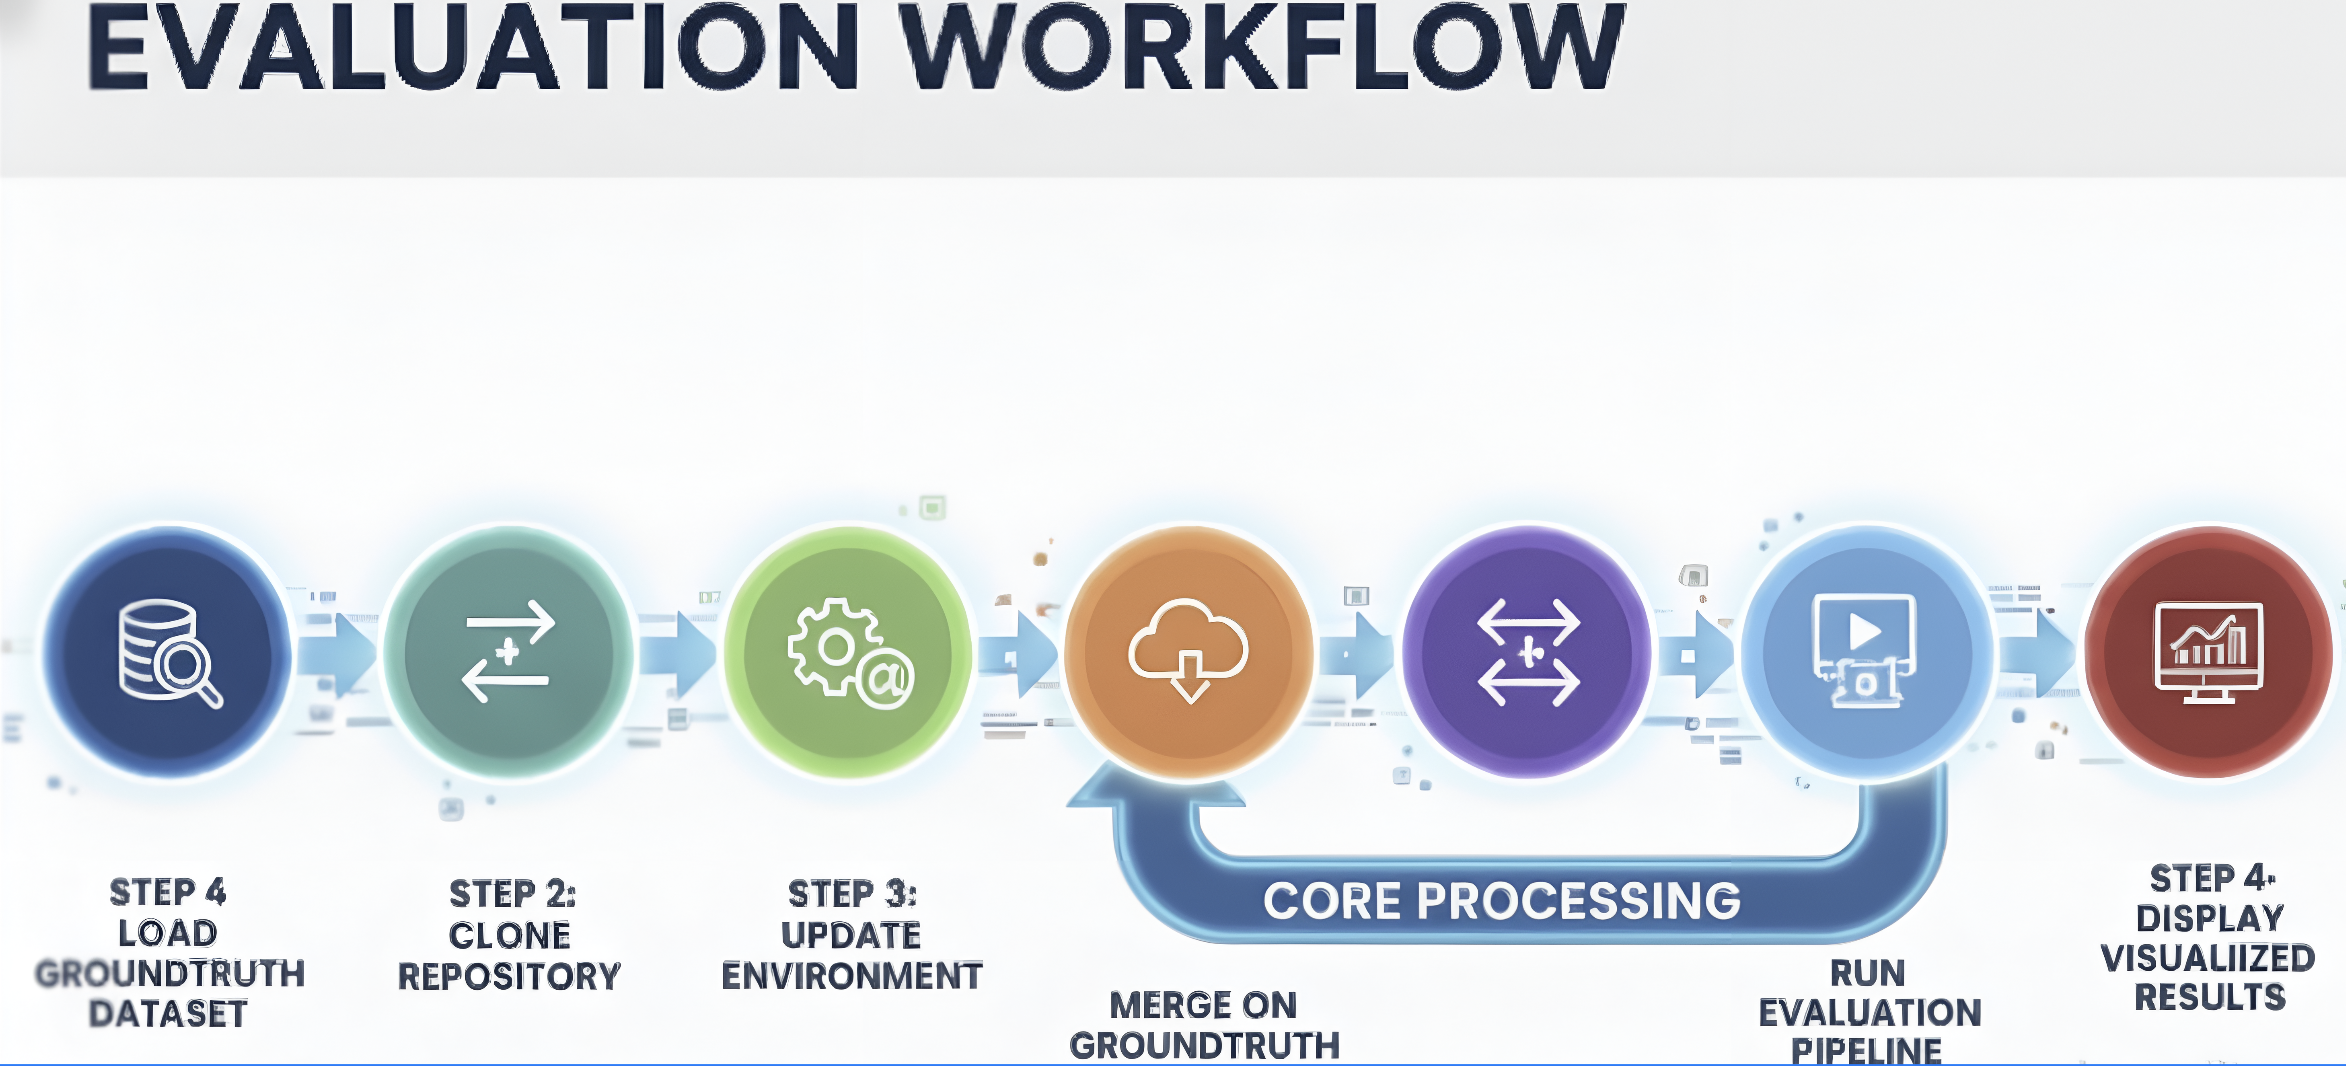

This notebook demonstrates how to evaluate different Large Language Models (LLMs)
on data science tasks using the DSBC (Data Science Benchmark for Code) dataset.

The workflow:
1. Load the DSBC dataset with ground truth answers
2. Set up your preferred LLM provider (Gemini, OpenAI, Claude, etc.)
3. Evaluate LLM responses against ground truth using a judge model
4. Compare performance across multiple LLMs with visualizations


 ### **Step 1: Load Ground Truth dataset**


 Purpose: Load the DSBC benchmark dataset which contains data science tasks,
 queries, and expected solutions that we'll use to evaluate LLMs


In [ ]:
# Load the DSBC v0 dataset from Hugging Face
# This dataset contains various data science tasks with ground truth solutions

from datasets import load_dataset
import pandas as pd

ds = load_dataset("large-traversaal/dsbc_v0")["train"]

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# Convert the dataset to a pandas DataFrame for easier manipulation

ds_df=pd.DataFrame(ds)

# Clean up the dataset structure:

ds_df=ds_df.drop(columns=['Query_Raw'])
ds_df=ds_df.rename(columns={'Query_Clean': 'Query'})

#Display first 15 rows
ds_df.head(15)

Index      Dataset                                              Tasks  \
0       1  AQI Dataset                               Correlation Analysis   
1       2  AQI Dataset                                         Statistics   
2       3  AQI Dataset                           Statistics, Data Parsing   
3       4  AQI Dataset                    Data Pre-processing, Statistics   
4       5  AQI Dataset                    Data Pre-processing, Statistics   
5       6  AQI Dataset  Data Pre-processing, Statistics, Feature Trans...   
6       7  AQI Dataset                    Feature Engineering, Statistics   
7       8  AQI Dataset                               Correlation Analysis   
8       9  AQI Dataset                               Correlation Analysis   
9      10  AQI Dataset                 Feature Transformation, Statistics   
10     11  AQI Dataset                 Feature Transformation, Statistics   
11     12  AQI Dataset                 Feature Transformation, Statistics   
12     13  AQI Dataset                 Feature Transformation, Statistics   
13     14  AQI Dataset                               Correlation Analysis   
14     15  AQI Dataset                               Correlation Analysis   

                                                Query  \
0   Is there a correlation between the average win...   
1   Was there an hourly period during which the hi...   
2   How frequently does the wind direction measure...   
3   If it has been raining for 3 hours, what is th...   
4   If it rains for over 3 hours on a day, what is...   
5   If it rains, what is the average duration it u...   
6   Is the predominant wind direction more frequen...   
7   Is humidity more strongly correlated with air ...   
8   Is wind speed more strongly correlated with ai...   
9   Is there an average peak wind speed associated...   
10  What is the average hour of the day with the h...   
11  What is the average hour of the day with the h...   
12  Is there an hour of the day during which wind ...   
13  Is there a correlation between actual temperat...   
14  Is there a correlation between NO2 and NO that...   

                                    Response_Expected  \
0                               Weak positive (0.012)   
1               9 Dec 2022 - Any of 9-10pm or 10-11pm   
2                                              0.8782   
3                                                0.62   
4                                              0.4286   
5                                          2.24 Hours   
6            The wind is mostly towards the east.\n\n   
7   Correlation between RH (%) and AT (degree C) (...   
8   Wind speed has more correlation with Air Tempe...   
9                                12pm - 1pm, 0.91 m/s   
10                                          1am - 2am   
11                                          6am - 7am   
12  The hour with the highest average wind-speed v...   
13                             Weak negative (-0.007)   
14                          Moderate Positive (0.513)   

                                        Solution_Code  
0   df_AQI['From Date'] = pd.to_datetime(df_AQI['F...  
1   max_ws = df_AQI['WS (m/s)'].max()\nhighest_ws_...  
2   wind_direction_working_count = df_AQI['WD (deg...  
3   def prob_rain_2_more_hours(df):\n    df['is_ra...  
4   # assume df_AQI is loaded\nimport pandas as pd...  
5   df_AQI['From Date'] = pd.to_datetime(df_AQI['F...  
6   def categorize_wind_direction(degrees):\n    i...  
7   correlation_air_temp_rh = df_AQI['RH (%)'].cor...  
8   correlation_ws_temp = df_AQI['WS (m/s)'].corr(...  
9   df_AQI['From Date'] = pd.to_datetime(df_AQI['F...  
10  df_AQI['From Date'] = pd.to_datetime(df_AQI['F...  
11  df_AQI['From Date'] = pd.to_datetime(df_AQI['F...  
12  import pandas as pd\n\n# normalize and extract...  
13  correlation = df_AQI['Temp (degree C)'].corr(d...  
14  print(df_AQI['NO2 (ug/m3)'].corr(df_AQI['NO (u...

## **Step 2: Clone the Evaluation Repository**

The DSBC evaluation logic is maintained in a separate GitHub repository.  
This repository contains the **judge LLM implementation** and **metric calculation code** used during evaluation.

We clone this repository to access the evaluation scripts needed for running DSBC benchmarks.

The `--branch` flag is used to clone a **feature branch** that contains evaluation-specific logic.

### **Notes**
- The cloned repository includes:
  - Judge LLM logic
  - Evaluation pipelines
  - Metric calculators
- Ensure the correct feature branch is used, as evaluation code may not be present on the default branch.



In [ ]:
!git clone --branch feature/run_separate_evals https://github.com/traversaal-ai/DSBC-Data-Science-Task-Evaluation.git


fatal: destination path 'DSBC-Data-Science-Task-Evaluation' already exists and is not an empty directory.





**Open path of DSBC-Data-Science-Task-Evaluation and Install required Python packages from the repository's requirements.txt**
 This ensures all dependencies (LLM clients, evaluation libraries, etc.) are available

- after installing requirements it might ask you restart runtime, make sure you load dataset above again

In [ ]:
%cd DSBC-Data-Science-Task-Evaluation
#install dependencies
!pip install -r requirements.txt


##**STEP 3: AI Provider Setup (Interactive Configuration)**


This section helps you connect to an LLM service (like OpenAI, Gemini, etc.)
through an interactive UI. It supports multiple providers and helps you
configure API access either through Colab secrets, file upload, or manual entry.

**Why this is important:**
- Different LLM providers require different authentication methods
- This UI simplifies the setup process
- It handles secure storage of API keys
- It allows easy switching between providers for comparison
"""


**MODELS:**

- provide your model after selecting provider for llm as judge to evaluate
- preffered model is gemini-2.5-flash for evaluation

### **Supported LLM Providers**

| Provider | Models | Setup Required |
|----------|--------|----------------|
| **vertex_ai** | Gemini 2.5 Flash,  Gemini 2.5 pro| GCP credentials |
| **anthropic_vertex** | Claude Sonnet 4 | GCP credentials |
| **openai** |GPT-5 | API key |
| **claude** | Claude Sonnet 4, | API key |
| **gemini** | Gemini 2.5 Pro | API key |
| **azure** | your_model| Azure credentials |
| **openrouter** | Various models (gpt-5.1-codex, gpt-o4-mini, glm-4.5) | API key |


In [ ]:

"""
Interactive Multi-Provider LLM Setup
Simply select a provider from the dropdown
"""

import os
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
from google.colab import userdata, files

# Global variables to store selections
selected_provider = None
selected_model = None

# Provider configurations with recommended models
PROVIDER_CONFIG = {
    'gemini': {
        'name': 'Gemini (Recommended )',
        'key_name': 'GEMINI_API_KEY',
        'model_default': 'gemini-2.5-flash',
        'model_examples': [
            'gemini-2.5-pro',
            'gemini-1.5-pro',
            'gemini-1.5-flash'
        ],
        'instructions': 'Get your free API key at: https://aistudio.google.com/apikey',
        'required_vars': ['GEMINI_API_KEY'],
        'needs_model_input': True
    },
    'openai': {
        'name': 'OpenAI',
        'key_name': 'OPENAI_API_KEY',
        'model_default': 'gpt-4o-mini',
        'model_examples': [
            'gpt-4o-mini',
            'gpt-4o',
            'gpt-4-turbo',
            'gpt-3.5-turbo'
        ],
        'instructions': 'Get your API key at: https://platform.openai.com/api-keys',
        'required_vars': ['OPENAI_API_KEY'],
        'needs_model_input': True
    },
    'claude': {
        'name': 'Claude (Anthropic)',
        'key_name': 'ANTHROPIC_API_KEY',
        'model_default': 'claude-3-5-sonnet-20241022',
        'model_examples': [
            'claude-3-5-sonnet-20241022',
            'claude-sonnet-4-20250514',
            'claude-3-5-haiku-20241022',
            'claude-3-opus-20240229'
        ],
        'instructions': 'Get your API key at: https://console.anthropic.com/',
        'required_vars': ['ANTHROPIC_API_KEY'],
        'needs_model_input': True
    },
    'openrouter': {
        'name': 'OpenRouter (Multiple Models)',
        'key_name': 'OPENROUTER_API_KEY',
        'model_default': 'anthropic/claude-3.5-sonnet',
        'model_examples': [
            'anthropic/claude-3.5-sonnet',
            'openai/gpt-4o-mini',
            'google/gemini-2.5-flash',
            'meta-llama/llama-3.1-70b-instruct'
        ],
        'instructions': 'Get your API key at: https://openrouter.ai/keys',
        'required_vars': ['OPENROUTER_API_KEY'],
        'needs_model_input': True
    },
    'azure': {
        'name': 'Azure OpenAI',
        'key_name': 'AZURE_OPENAI_API_KEY',
        'model_default': 'gpt-4',
        'model_examples': [],
        'instructions': 'Requires: API Key, Endpoint, and Deployment Name',
        'required_vars': ['AZURE_OPENAI_API_KEY', 'AZURE_OPENAI_ENDPOINT', 'AZURE_OPENAI_DEPLOYMENT'],
        'needs_model_input': False
    },
    'vertex_ai': {
        'name': 'Vertex AI (Google Cloud)',
        'key_name': 'GOOGLE_CLOUD_PROJECT_ID',
        'model_default': 'gemini-1.5-pro',
        'model_examples': [
            'gemini-1.5-pro',
            'gemini-1.5-flash',
            'gemini-2.5-flash'
        ],
        'instructions': 'Requires: GCP Project ID and Service Account credentials',
        'required_vars': ['GOOGLE_CLOUD_PROJECT_ID', 'GOOGLE_CLOUD_PRIVATE_KEY_ID', 'GOOGLE_CLOUD_PRIVATE_KEY',
                         'GOOGLE_CLOUD_CLIENT_EMAIL', 'GOOGLE_CLOUD_CLIENT_X509_CERT_URL'],
        'needs_model_input': True
    },
    'anthropic_vertex': {
        'name': 'Anthropic on Vertex AI',
        'key_name': 'GOOGLE_CLOUD_PROJECT_ID',
        'model_default': 'claude-sonnet-4-20250514',
        'model_examples': [
            'claude-sonnet-4-20250514',
            'claude-3-5-sonnet-v2@20241022',
            'claude-3-5-haiku@20241022'
        ],
        'instructions': 'Requires: GCP Project ID and Service Account credentials',
        'required_vars': ['GOOGLE_CLOUD_PROJECT_ID', 'GOOGLE_CLOUD_PRIVATE_KEY_ID', 'GOOGLE_CLOUD_PRIVATE_KEY',
                         'GOOGLE_CLOUD_CLIENT_EMAIL', 'GOOGLE_CLOUD_CLIENT_X509_CERT_URL'],
        'needs_model_input': True
    }
}

def create_env_file(env_vars):
    """Create .env file from dictionary of environment variables"""
    with open('.env', 'w') as f:
        for key, value in env_vars.items():
            if value:
                f.write(f'{key}={value}\n')
    return ".env file created successfully"

def get_from_colab_secrets(key_name):
    """Try to get API key from Colab secrets"""
    try:
        return userdata.get(key_name)
    except:
        return None

def save_selections(provider, model):
    """Save provider and model selections to global variables"""
    global selected_provider, selected_model
    selected_provider = provider
    selected_model = model
    print(f"\n✓ Configuration updated: {provider} with model {model}")

def setup_provider_ui():
    """Create simplified UI for provider setup"""

    # Clear any existing widgets
    clear_output(wait=True)

    # Header
    display(HTML("""
    <div style='background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                padding: 20px; border-radius: 10px; margin-bottom: 20px;'>
        <h2 style='color: white; margin: 0;'> LLM Provider Setup</h2>
        <p style='color: white; margin: 5px 0 0 0;'>Select a provider to automatically configure it</p>
    </div>
    """))

    # Provider dropdown
    provider_dropdown = widgets.Dropdown(
        options=[(config['name'], key) for key, config in PROVIDER_CONFIG.items()],
        description='Provider:',
        style={'description_width': '100px'},
        layout=widgets.Layout(width='600px')
    )

    # Model dropdown
    model_dropdown = widgets.Dropdown(
        options=[],
        description='Model:',
        style={'description_width': '100px'},
        layout=widgets.Layout(width='600px')
    )

    # Status output
    status_output = widgets.Output()

    def update_model_options(provider_key):
        """Update model options based on selected provider"""
        config = PROVIDER_CONFIG[provider_key]
        if config['needs_model_input']:
            model_dropdown.options = config['model_examples']
            model_dropdown.value = config['model_default']
            model_dropdown.layout.visibility = 'visible'
        else:
            model_dropdown.options = []
            model_dropdown.layout.visibility = 'hidden'

    def apply_configuration(provider_key, model_value):
        """Apply configuration for the selected provider and model"""
        with status_output:
            clear_output(wait=True)

            config = PROVIDER_CONFIG[provider_key]

            # Check if we have the required credentials
            env_vars = {}
            all_found = True

            print(f"\n🔍 Checking credentials for {config['name']}...")

            for var in config['required_vars']:
                secret_value = get_from_colab_secrets(var)
                if secret_value:
                    print(f"✓ Found {var} in Colab Secrets")
                    env_vars[var] = secret_value
                else:
                    all_found = False
                    print(f"✗ Missing {var}")

            if all_found:
                # Add model and other settings to env_vars
                env_vars['LLM_MODEL_NAME'] = model_value
                env_vars['LLM_TEMPERATURE'] = '0.3'
                env_vars['LLM_MAX_TOKENS'] = '8192'

                # Add provider-specific variables
                if provider_key == 'vertex_ai':
                    env_vars['VERTEX_LOCATION'] = 'us-central1'
                elif provider_key == 'anthropic_vertex':
                    env_vars['ANTHROPIC_VERTEX_REGION'] = 'us-east5'
                elif provider_key == 'azure':
                    env_vars['OPENAI_API_VERSION'] = '2024-02-15-preview'

                # Create .env file
                msg = create_env_file(env_vars)
                print(f"✅ Success: {msg}")

                # Save selections to global variables
                save_selections(provider_key, model_value)

                print(f"\n🚀 Ready to use with model: {model_value}")
                print("\n📋 Next steps:")
                print("   1. Run test_setup() to verify your configuration")
                print(f"   2. Access selections via: selected_provider, selected_model")
            else:
                print(f"\n❌ Missing credentials for {config['name']}")
                print(f"\n📝 Setup instructions:")
                print(f"   {config['instructions']}")
                print("\n🔑 To add credentials:")
                print("   1. Click the 🔑 key icon in the left sidebar")
                print("   2. Toggle 'Notebook access' ON")
                print("   3. Add the required secrets:")
                for var in config['required_vars']:
                    print(f"      - {var}")
                print("   4. Select the provider again to apply the configuration")

    def on_provider_change(change):
        """Handle provider selection"""
        provider_key = change['new']
        update_model_options(provider_key)

        # Get the model value (either from dropdown or default)
        config = PROVIDER_CONFIG[provider_key]
        model_value = model_dropdown.value if config['needs_model_input'] else config['model_default']

        # Apply configuration immediately
        apply_configuration(provider_key, model_value)

    def on_model_change(change):
        """Handle model selection"""
        provider_key = provider_dropdown.value
        model_value = change['new']
        apply_configuration(provider_key, model_value)

    # Set up observers
    provider_dropdown.observe(on_provider_change, names='value')
    model_dropdown.observe(on_model_change, names='value')

    # Display the UI
    display(widgets.VBox([
        provider_dropdown,
        model_dropdown,
        status_output
    ]))

    # Initialize with the first provider
    update_model_options(provider_dropdown.value)
    apply_configuration(provider_dropdown.value, model_dropdown.value if model_dropdown.value else PROVIDER_CONFIG[provider_dropdown.value]['model_default'])

# Run the setup UI
setup_provider_ui()

# Quick test function
def test_setup():
    """Test if setup was successful"""
    global selected_provider, selected_model

    try:
        from generate_answers.llm_clients import load_config_from_env, LLMPipeline
        from dotenv import load_dotenv
        load_dotenv()

        # Detect provider from .env
        provider = None
        if os.getenv('GEMINI_API_KEY'):
            provider = 'gemini'
        elif os.getenv('OPENAI_API_KEY'):
            provider = 'openai'
        elif os.getenv('ANTHROPIC_API_KEY'):
            provider = 'claude'
        elif os.getenv('OPENROUTER_API_KEY'):
            provider = 'openrouter'
        elif os.getenv('AZURE_OPENAI_API_KEY'):
            provider = 'azure'
        elif os.getenv('GOOGLE_CLOUD_PROJECT_ID') and os.getenv('ANTHROPIC_VERTEX_REGION'):
            provider = 'anthropic_vertex'
        elif os.getenv('GOOGLE_CLOUD_PROJECT_ID'):
            provider = 'vertex_ai'

        if not provider:
            print("❌ Error: No API key found in .env file")
            print("\n📋 Please complete the setup above first")
            return

        model = os.getenv('LLM_MODEL_NAME', 'default')

        # Update global variables if not set
        if not selected_provider:
            selected_provider = provider
        if not selected_model:
            selected_model = model

        print(f"Testing {provider} connection...")
        print(f" Using model: {model}")

        config = load_config_from_env(provider)
        pipeline = LLMPipeline(config)

        response = pipeline.answer_question("Say 'Hello, I'm working!' in a friendly way.")
        print(f"\n Success! Response: {response}")
        print(f"\nYour {provider} setup is working correctly!")
        print(f"\nCurrent selections:")
        print(f"   selected_provider = '{selected_provider}'")
        print(f"   selected_model = '{selected_model}'")

    except Exception as e:
        print(f" Error: {str(e)}")
        print("\n Troubleshooting:")
        print("1. Check that your API key is correct")
        print("2. Ensure required packages are installed:")
        print("   pip install openai anthropic google-generativeai python-dotenv")
        print("3. Verify your .env file was created properly")

print("\n" + "=" * 70)
print("TEST YOUR SETUP")
print("=" * 70)
print("After configuration, run: test_setup()")
print("\nAccess your selections:")
print("   selected_provider  # Returns the provider name")
print("   selected_model     # Returns the model name")
print("=" * 70)

OR UPLOAD YOUR .env


In [ ]:

from google.colab import files

uploaded = files.upload()  # select your .env from your local machine


confirm and view your provider and model

In [ ]:
print(selected_provider)
print(selected_model)

openrouter
google/gemini-2.5-flash


Check if your model and env is properly set

In [ ]:
test_setup()

🧪 Testing openrouter connection...
📦 Using model: google/gemini-2.5-flash

✅ Success! Response: "Hey there! Just wanted to say hello, I'm working away over here!"

🎉 Your openrouter setup is working correctly!

📊 Current selections:
   selected_provider = 'openrouter'
   selected_model = 'google/gemini-2.5-flash'



## **STEP 4: Run Single File Evaluation**


This step runs the evaluation on a single file containing LLM responses.
It uses the evaluation repository's main.py script to compare the LLM responses
against the ground truth in the dataset.

Why run a single file evaluation?
- Tests the evaluation pipeline
- Provides quick feedback on a subset of data
- Useful for debugging and verification
- Allows for targeted evaluation of specific responses
"""

In [ ]:
#single file evaluation:
!python main.py \
  --mode dataset \
  --judge-provider {selected_provider} \
  --judge-model {selected_model} \
  --processed-file temp/all_results/gpt-4o-data-science_9f8b.csv

DSBC DATASET EVALUATION (EVAL-ONLY MODE)
Judge Provider: openrouter
Judge Model: google/gemini-2.5-flash
Processed file: temp/all_results/gpt-4o-data-science_9f8b.csv
----------------------------------------------------------------------
!!! Evaluations Started !!!

Provider: openrouter
Model: google/gemini-2.5-flash
Loading data from: temp/all_results/gpt-4o-data-science_9f8b.csv
Starting evaluation...
Processing rows: 100% 5/5 [00:02<00:00,  1.93it/s]

=== EVALUATION COUNTS ===
evaluation_result
Yes    4
No     1
Name: count, dtype: int64

=== DETAILED EVALUATION METRICS ===
Overall Accuracy: 80.00%
Success Rate: 100.00%
Yes Count: 4
No Count: 1
Unknown Count: 0
Total Entries: 5
Total Evaluated: 5

=== TASK-SPECIFIC METRICS ===
Feature Transformation: 100.00% (1/1)
Statistics: 100.00% (3/3)
Data Pre-processing: 66.67% (2/3)
Data Parsing: 0.00% (0/1)
Correlation Analysis: 100.00% (1/1)

=== DATASET-SPECIFIC METRICS ===
WEATHER Dataset: 100.00% (2/2)
PRODUCTION Dataset: 100.00% (1/1)
S


## **Understanding Evaluation Metrics**


The evaluation provides several metrics to assess LLM performance:

- overall accuracy: Percentage of correct responses across all queries
- task specific accuracy: Accuracy broken down by data science task type
- dataset specific accuracy: Accuracy broken down by dataset

** Sample metrics structure: **


**Overall:**

    {'accuracy': 0.6, 'success_rate': 1.0, 'yes_count': 3, 'no_count': 2, 'unknown_count': 0, 'total_entries': 5, 'total_evaluated': 5}


**Tasks:**

    {'Feature Transformation': {'accuracy': 0.0, 'yes_count': 0, 'no_count': 1, 'unknown_count': 0, 'total_count': 1, 'evaluated_count': 1}, 'Statistics': {'accuracy': 0.6666666666666666, 'yes_count': 2, 'no_count': 1, 'unknown_count': 0, 'total_count': 3, 'evaluated_count': 3}, 'Data Pre-processing': ......}

**Datasets:**

    {'WEATHER Dataset': {'accuracy': 0.5, 'yes_count': 1, 'no_count': 1, 'unknown_count': 0, 'total_count': 2, 'evaluated_count': 2},.....}

Why these metrics matter:
- Overall accuracy gives a general performance measure
- Task-specific accuracy
- Dataset-specific accuracy


##**STEP 5: Evaluate All LLMs/Agents Answers**


This step loads a CSV file containing responses from multiple LLMs/agents
and evaluates them against the ground truth. It processes each model's responses
separately and generates comparison metrics.

Why evaluate multiple models?
- Allows for direct comparison between different LLMs
- Identifies which models perform best on specific tasks
- Provides insights into model strengths and weaknesses
- Helps in selecting the best model for specific use cases
"""

In [ ]:
#Load csv with llm/agent answers
all_answered_dataset=pd.read_csv("temp/all_results/dsbc_llms_df.csv")
all_answered_dataset.head()

Dataset                                              Query  \
0  AQI Dataset  Is there a correlation between the average win...   
1  AQI Dataset  Was there an hourly period during which the hi...   
2  AQI Dataset  How frequently does the wind direction measure...   
3  AQI Dataset  If it has been raining for 3 hours, what is th...   
4  AQI Dataset  If it rains for over 3 hours on a day, what is...   

              claude-sonnet-4@20250514_Response_code  \
0  \nCODE: import pandas as pd\nimport numpy as n...   
1  \nCODE: import pandas as pd\nimport numpy as n...   
2  \nCODE: import pandas as pd\nimport numpy as n...   
3  \nCODE: import pandas as pd\nimport numpy as n...   
4  \nCODE: import pandas as pd\nimport numpy as n...   

            claude-sonnet-4@20250514_Response_output  \
0  Step 1 Output:\nData shape: (8737, 24)\n\nMiss...   
1  Step 1 Output:\nMissing values in WS (m/s): 69...   
2  Step 1 Output:\n=== Wind Direction Measurement...   
3  Step 1 Output:\nTotal hours with valid rainfal...   
4  Step 1 Output:\nData preprocessing completed\n...   

          claude-sonnet-4@20250514_Response_analysis  \
0  Based on my analysis of your air quality datas...   
1  Based on my analysis of your wind speed data, ...   
2  Based on my analysis of your dataset, I can te...   
3  Based on my analysis of your weather dataset, ...   
4  Based on my analysis of your weather dataset, ...   

         claude-sonnet-4@20250514_Response_reasoning  \
0  ### STEP 1 ### : First, I need to import the n...   
1  ### STEP 1 ### : I need to identify the wind s...   
2  ### STEP 1 ### : I need to analyze the wind di...   
3  ### STEP 1 ### : This step calculates the cond...   
4  ### STEP 1 ### : First, I need to convert the ...   

                        gemini-2.5-pro_Response_code  \
0  \nCODE: import pandas as pd\nimport matplotlib...   
1  \nCODE: import pandas as pd\n\n# The 'data' Da...   
2  \nCODE: import pandas as pd\nimport io\n\n# Th...   
3  \nCODE: import pandas as pd\n\n# The dataframe...   
4  \nCODE: import pandas as pd\n\n# The prompt sp...   

                      gemini-2.5-pro_Response_output  \
0  Step 1 Output:\nCorrelation between Average Wi...   
1  Step 1 Output:\nYes, the highest wind speed re...   
2  Step 1 Error: Error tokenizing data. C error: ...   
3  Step 1 Output:\nData prepared with 'is_raining...   
4  Step 1 Output:\nAnalysis of Rainfall Data:\nTo...   

                    gemini-2.5-pro_Response_analysis  \
0  Of course! Here is a plain-language explanatio...   
1  Of course! Here is a clear, brief explanation ...   
2  Could not generate analysis due to code execut...   
3  Could not generate analysis due to code execut...   
4  Of course! Here is a clear explanation of the ...   

                   gemini-2.5-pro_Response_reasoning  ...  \
0  ### STEP 1 ### : To analyze the relationship b...  ...   
1  ### STEP 1 ### : To answer the query, the code...  ...   
2  ### STEP 1 ### : To determine the recording fr...  ...   
3  ### STEP 1 ### : To analyze the time-series da...  ...   
4  ### STEP 1 ### : The overall goal is to calcul...  ...   

                    openai_o4-mini_Response_analysis  \
0  I looked at every day’s average wind speed and...   
1  I checked every hourly record in your dataset ...   
2  I dug into your data and here’s what I found a...   
3  I looked through every stretch of three consec...   
4  I looked at about 8,700 hourly measurements of...   

                   openai_o4-mini_Response_reasoning  \
0  ### STEP 1 ### : Aggregate the hourly data int...   
1  ### STEP 1 ### : Convert the date columns to d...   
2  ### STEP 1 ### : Convert the timestamp column ...   
3  ### STEP 1 ### : Sort the data chronologically...   
4  ### STEP 1 ### : Convert timestamps to dates t...   

                          z-ai_glm-4.5_Response_code  \
0                                                NaN   
1  \nCODE: import pandas as pd\n\n# Check if the ...   
2  \nCODE: import pandas

In [ ]:
all_answered_dataset.columns


Index(['Dataset', 'Query', 'claude-sonnet-4@20250514_Response_code',
       'claude-sonnet-4@20250514_Response_output',
       'claude-sonnet-4@20250514_Response_analysis',
       'claude-sonnet-4@20250514_Response_reasoning',
       'gemini-2.5-pro_Response_code', 'gemini-2.5-pro_Response_output',
       'gemini-2.5-pro_Response_analysis', 'gemini-2.5-pro_Response_reasoning',
       'openai_gpt-5.1-codex_Response_code',
       'openai_gpt-5.1-codex_Response_output',
       'openai_gpt-5.1-codex_Response_analysis',
       'openai_gpt-5.1-codex_Response_reasoning',
       'openai_o4-mini_Response_code', 'openai_o4-mini_Response_output',
       'openai_o4-mini_Response_analysis', 'openai_o4-mini_Response_reasoning',
       'z-ai_glm-4.5_Response_code', 'z-ai_glm-4.5_Response_output',
       'z-ai_glm-4.5_Response_analysis', 'z-ai_glm-4.5_Response_reasoning',
       'olive_Response_code', 'olive_Response_output',
       'olive_Response_analysis', 'olive_Response_reasoning'],
      dtype='

In [ ]:
# Select only the columns you want from ds_df
ds_subset = ds_df[['Query', 'Response_Expected', 'Solution_Code']]

# Merge using only these three columns
all_answered_dataset = all_answered_dataset.merge(ds_subset, on='Query', how='left')

all_answered_dataset.head()


Dataset                                              Query  \
0  AQI Dataset  Is there a correlation between the average win...   
1  AQI Dataset  Was there an hourly period during which the hi...   
2  AQI Dataset  How frequently does the wind direction measure...   
3  AQI Dataset  If it has been raining for 3 hours, what is th...   
4  AQI Dataset  If it rains for over 3 hours on a day, what is...   

              claude-sonnet-4@20250514_Response_code  \
0  \nCODE: import pandas as pd\nimport numpy as n...   
1  \nCODE: import pandas as pd\nimport numpy as n...   
2  \nCODE: import pandas as pd\nimport numpy as n...   
3  \nCODE: import pandas as pd\nimport numpy as n...   
4  \nCODE: import pandas as pd\nimport numpy as n...   

            claude-sonnet-4@20250514_Response_output  \
0  Step 1 Output:\nData shape: (8737, 24)\n\nMiss...   
1  Step 1 Output:\nMissing values in WS (m/s): 69...   
2  Step 1 Output:\n=== Wind Direction Measurement...   
3  Step 1 Output:\nTotal hours with valid rainfal...   
4  Step 1 Output:\nData preprocessing completed\n...   

          claude-sonnet-4@20250514_Response_analysis  \
0  Based on my analysis of your air quality datas...   
1  Based on my analysis of your wind speed data, ...   
2  Based on my analysis of your dataset, I can te...   
3  Based on my analysis of your weather dataset, ...   
4  Based on my analysis of your weather dataset, ...   

         claude-sonnet-4@20250514_Response_reasoning  \
0  ### STEP 1 ### : First, I need to import the n...   
1  ### STEP 1 ### : I need to identify the wind s...   
2  ### STEP 1 ### : I need to analyze the wind di...   
3  ### STEP 1 ### : This step calculates the cond...   
4  ### STEP 1 ### : First, I need to convert the ...   

                        gemini-2.5-pro_Response_code  \
0  \nCODE: import pandas as pd\nimport matplotlib...   
1  \nCODE: import pandas as pd\n\n# The 'data' Da...   
2  \nCODE: import pandas as pd\nimport io\n\n# Th...   
3  \nCODE: import pandas as pd\n\n# The dataframe...   
4  \nCODE: import pandas as pd\n\n# The prompt sp...   

                      gemini-2.5-pro_Response_output  \
0  Step 1 Output:\nCorrelation between Average Wi...   
1  Step 1 Output:\nYes, the highest wind speed re...   
2  Step 1 Error: Error tokenizing data. C error: ...   
3  Step 1 Output:\nData prepared with 'is_raining...   
4  Step 1 Output:\nAnalysis of Rainfall Data:\nTo...   

                    gemini-2.5-pro_Response_analysis  \
0  Of course! Here is a plain-language explanatio...   
1  Of course! Here is a clear, brief explanation ...   
2  Could not generate analysis due to code execut...   
3  Could not generate analysis due to code execut...   
4  Of course! Here is a clear explanation of the ...   

                   gemini-2.5-pro_Response_reasoning  ...  \
0  ### STEP 1 ### : To analyze the relationship b...  ...   
1  ### STEP 1 ### : To answer the query, the code...  ...   
2  ### STEP 1 ### : To determine the recording fr...  ...   
3  ### STEP 1 ### : To analyze the time-series da...  ...   
4  ### STEP 1 ### : The overall goal is to calcul...  ...   

                          z-ai_glm-4.5_Response_code  \
0                                                NaN   
1  \nCODE: import pandas as pd\n\n# Check if the ...   
2  \nCODE: import pandas as pd\nimport matplotlib...   
3  \nCODE: import pandas as pd\nimport numpy as n...   
4  \nCODE: import pandas as pd\nimport numpy as n...   

                        z-ai_glm-4.5_Response_output  \
0                                                NaN   
1  Step 1 Output:\nHighest wind speed of 3.12 m/s...   
2  Step 1 Output:\nTotal time intervals: 8737\nWi...   
3  Step 1 Output:\nData with new 'is_raining' col...   
4  Step 1 Output:\nData preparation completed:\nT...   

                      z-ai_glm-4.5_Response_analysis  \
0  JSON parsing failed: Unterminated string start...   
1  Yes, I found an hourly period with the highest...   
2  Based on my analysis 


##**STEP 6: Process and Evaluate Each LLM**


This section defines functions to process the data for each LLM and run
the evaluation. It handles the data preparation, execution of the evaluation,
and collection of results.

Why process each LLM separately?
- Each LLM has its own response format
- Allows for customized processing per model
- Simplifies the evaluation pipeline
- Makes it easier to add new models in the future
"""

In [ ]:
# Processing CSV outputs for each evaluated LLM

import pandas as pd
import subprocess
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# List of LLMs to be evaluated
LLMs = [
    "claude-sonnet-4@20250514",
    "gemini-2.5-pro",
    "openai_gpt-5.1-codex",
    "openai_o4-mini",
    "z-ai_glm-4.5",
    "olive"
]

# -------------------------------------------------------------------
# Process data for a specific LLM
#
# This function prepares model outputs for DSBC evaluation by:
# 1. Optionally limiting the number of samples
# 2. Selecting the required base dataset columns
# 3. Extracting LLM-specific response columns
# 4. Renaming columns to a standardized DSBC schema
# -------------------------------------------------------------------
def process_llm_data(df, num_samples, llm_name):

    # Optionally limit the number of rows for faster evaluation
    if num_samples is not None:
        df_filtered = df.head(num_samples).copy()
    else:
        df_filtered = df.copy()

    # Base columns required for DSBC evaluation
    base_columns = [
        'Dataset',
        'Query',
        'Response_Expected',
        'Solution_Code'
    ]

    # LLM-specific response columns generated during inference
    llm_columns = [
        f'{llm_name}_Response_code',
        f'{llm_name}_Response_output',
        f'{llm_name}_Response_analysis',
        f'{llm_name}_Response_reasoning'
    ]

    # Select only the columns relevant for evaluation
    columns_to_keep = base_columns + llm_columns
    df_processed = df_filtered[columns_to_keep].copy()

    # Rename LLM-specific columns to a standard format
    # expected by the DSBC evaluation pipeline
    rename_map = {
        f'{llm_name}_Response_code': 'Response_code',
        f'{llm_name}_Response_output': 'Response_output',
        f'{llm_name}_Response_analysis': 'Response_analysis',
        f'{llm_name}_Response_reasoning': 'Response_reasoning'
    }
    df_processed.rename(columns=rename_map, inplace=True)

    return df_processed


In [ ]:
# Use evaluation utilities from the DSBC evaluation repository
from dsbc_metrics_getter import get_evaluation_metrics

def run_evaluation(df_processed, llm_name, output_dir='./eval_results'):
    """
    Runs DSBC evaluation on a processed dataframe and returns overall metrics.

    Parameters:
    - df_processed (pd.DataFrame): Model outputs formatted for DSBC evaluation
    - llm_name (str): Name of the evaluated LLM (used for logging/debugging)
    - output_dir (str): Directory to store intermediate and evaluation files
    """

    # Create the output directory if it does not already exist
    Path(output_dir).mkdir(parents=True, exist_ok=True)

    # Save the processed dataframe to a temporary CSV file
    # DSBC evaluation scripts expect input data in CSV format
    temp_file = f'{output_dir}/temp_processed.csv'

    # Rename column to match DSBC schema requirements
    df_processed = df_processed.rename(columns={'Query': 'Query_Clean'})

    # Write the processed data to disk for evaluation
    df_processed.to_csv(temp_file, index=False)

    try:
        # Run DSBC evaluation using the judge LLM
        # This returns detailed results along with aggregated metrics
        _, results = get_evaluation_metrics(
            processed_file=temp_file,
            judge_provider=selected_provider,
            judge_model=selected_model
        )

        # Extract overall evaluation metrics
        metrics = results['overall']

        print("Metrics:", metrics)
        return metrics

    except subprocess.CalledProcessError as e:
        # Handle evaluation failures gracefully
        print(f"Error running evaluation for {llm_name}: {e}")
        print(f"stderr: {e.stderr}")
        return None


In [ ]:
#run all csv:
def evaluate_all_llms(df, num_samples=None):
    results = []

    for llm_name in LLMs:
        print(f"\n{'='*60}")
        print(f"Evaluating: {llm_name}")
        print(f"{'='*60}")

        df_processed = process_llm_data(df, num_samples, llm_name)

        metrics = run_evaluation(df_processed, llm_name, output_dir=f'./eval_results/{llm_name}')

        if metrics:
            metrics['llm_name'] = llm_name
            results.append(metrics)

    results_df = pd.DataFrame(results)

    cols = ['llm_name', 'accuracy', 'success_rate', 'yes_count',
            'no_count', 'unknown_count', 'total_entries']
    results_df = results_df[[col for col in cols if col in results_df.columns]]

    return results_df

## **STEP 7: Visualize Results**


This optional step creates visualizations to help understand and compare
the performance of different LLMs. It generates bar charts, a heatmap,
and saves the results as an image.

Why visualize the results?
- Makes it easier to compare performance across models
- Highlights patterns and trends in the data
- Provides a quick overview of results
- Useful for presentations and reports


In [ ]:
def plot_comparison(results_df):
    sns.set_style("whitegrid")


    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('LLM Performance Comparison', fontsize=16, fontweight='bold')

    # ---- Plot 1: Accuracy ----
    ax1 = axes[0]
    bars1 = ax1.bar(range(len(results_df)), results_df['accuracy'] * 100)
    ax1.set_xticks(range(len(results_df)))
    ax1.set_xticklabels(results_df['llm_name'], rotation=45, ha='right')
    ax1.set_ylabel('Accuracy (%)')
    ax1.set_title('Overall Accuracy by LLM')
    ax1.set_ylim(0, 100)

    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', ha='center', va='bottom')

    # ---- Plot 2: Response Distribution ----
    ax2 = axes[1]
    x = range(len(results_df))
    width = 0.25

    ax2.bar([i - width for i in x], results_df['yes_count'], width,
            label='Yes', color='green', alpha=0.7)
    ax2.bar(x, results_df['no_count'], width,
            label='No', color='red', alpha=0.7)
    ax2.bar([i + width for i in x], results_df['unknown_count'], width,
            label='Unknown', color='gray', alpha=0.7)

    ax2.set_xticks(x)
    ax2.set_xticklabels(results_df['llm_name'], rotation=45, ha='right')
    ax2.set_ylabel('Count')
    ax2.set_title('Response Distribution')
    ax2.legend()

    plt.tight_layout()
    plt.savefig('llm_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nComparison plot saved as 'llm_comparison.png'")


In [ ]:
results_df = evaluate_all_llms(all_answered_dataset, num_samples=20)




Evaluating: claude-sonnet-4@20250514
GETTING EVALUATION METRICS
Judge Provider: openrouter
Judge Model: google/gemini-2.5-flash
Processed file: eval_results/claude-sonnet-4@20250514/temp_processed.csv
----------------------------------------------------------------------
!!! Evaluations Started !!!

Provider: openrouter
Model: google/gemini-2.5-flash
Loading data from: eval_results/claude-sonnet-4@20250514/temp_processed.csv
Starting evaluation...



Processing rows: 100%|██████████| 20/20 [00:10<00:00,  1.98it/s]


=== EVALUATION COUNTS ===
evaluation_result
Yes    14
No      6
Name: count, dtype: int64

=== DETAILED EVALUATION METRICS ===
Overall Accuracy: 70.00%
Success Rate: 100.00%
Yes Count: 14
No Count: 6
Unknown Count: 0
Total Entries: 20
Total Evaluated: 20

=== TASK-SPECIFIC METRICS ===

=== DATASET-SPECIFIC METRICS ===
AQI Dataset: 70.00% (14/20)
Evaluation results saved to: temp/results/evaluation_temp_processed.csv.json
Evaluated data saved to: temp/evaluated_data/evaluated_google_gemini-2.5-flash_temp_processed.csv

=== FINAL ACCURACY: 70.00% ===

✓ Evaluation complete!
Results type: tuple
Metrics: {'accuracy': 0.7, 'success_rate': 1.0, 'yes_count': 14, 'no_count': 6, 'unknown_count': 0, 'total_entries': 20, 'total_evaluated': 20}

Evaluating: gemini-2.5-pro
GETTING EVALUATION METRICS
Judge Provider: openrouter
Judge Model: google/gemini-2.5-flash
Processed file: eval_results/gemini-2.5-pro/temp_processed.csv
----------------------------------------------------------------------
!!!

Provider: openrouter
Model: google/gemini-2.5-flash
Loading data from: eval_results/gemini-2.5-pro/temp_processed.csv
Starting evaluation...



Processing rows: 100%|██████████| 20/20 [00:09<00:00,  2.04it/s]


=== EVALUATION COUNTS ===
evaluation_result
Yes    12
No      8
Name: count, dtype: int64

=== DETAILED EVALUATION METRICS ===
Overall Accuracy: 60.00%
Success Rate: 100.00%
Yes Count: 12
No Count: 8
Unknown Count: 0
Total Entries: 20
Total Evaluated: 20

=== TASK-SPECIFIC METRICS ===

=== DATASET-SPECIFIC METRICS ===
AQI Dataset: 60.00% (12/20)
Evaluation results saved to: temp/results/evaluation_temp_processed.csv.json
Evaluated data saved to: temp/evaluated_data/evaluated_google_gemini-2.5-flash_temp_processed.csv

=== FINAL ACCURACY: 60.00% ===

✓ Evaluation complete!
Results type: tuple
Metrics: {'accuracy': 0.6, 'success_rate': 1.0, 'yes_count': 12, 'no_count': 8, 'unknown_count': 0, 'total_entries': 20, 'total_evaluated': 20}

Evaluating: openai_gpt-5.1-codex
GETTING EVALUATION METRICS
Judge Provider: openrouter
Judge Model: google/gemini-2.5-flash
Processed file: eval_results/openai_gpt-5.1-codex/temp_processed.csv
--------------------------------------------------------------

Provider: openrouter
Model: google/gemini-2.5-flash
Loading data from: eval_results/openai_gpt-5.1-codex/temp_processed.csv
Starting evaluation...



Processing rows: 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


=== EVALUATION COUNTS ===
evaluation_result
Yes    16
No      4
Name: count, dtype: int64

=== DETAILED EVALUATION METRICS ===
Overall Accuracy: 80.00%
Success Rate: 100.00%
Yes Count: 16
No Count: 4
Unknown Count: 0
Total Entries: 20
Total Evaluated: 20

=== TASK-SPECIFIC METRICS ===

=== DATASET-SPECIFIC METRICS ===
AQI Dataset: 80.00% (16/20)
Evaluation results saved to: temp/results/evaluation_temp_processed.csv.json
Evaluated data saved to: temp/evaluated_data/evaluated_google_gemini-2.5-flash_temp_processed.csv

=== FINAL ACCURACY: 80.00% ===

✓ Evaluation complete!
Results type: tuple
Metrics: {'accuracy': 0.8, 'success_rate': 1.0, 'yes_count': 16, 'no_count': 4, 'unknown_count': 0, 'total_entries': 20, 'total_evaluated': 20}

Evaluating: openai_o4-mini
GETTING EVALUATION METRICS
Judge Provider: openrouter
Judge Model: google/gemini-2.5-flash
Processed file: eval_results/openai_o4-mini/temp_processed.csv
----------------------------------------------------------------------
!!!

Provider: openrouter
Model: google/gemini-2.5-flash
Loading data from: eval_results/openai_o4-mini/temp_processed.csv
Starting evaluation...



Processing rows: 100%|██████████| 20/20 [00:11<00:00,  1.82it/s]


=== EVALUATION COUNTS ===
evaluation_result
Yes    13
No      7
Name: count, dtype: int64

=== DETAILED EVALUATION METRICS ===
Overall Accuracy: 65.00%
Success Rate: 100.00%
Yes Count: 13
No Count: 7
Unknown Count: 0
Total Entries: 20
Total Evaluated: 20

=== TASK-SPECIFIC METRICS ===

=== DATASET-SPECIFIC METRICS ===
AQI Dataset: 65.00% (13/20)
Evaluation results saved to: temp/results/evaluation_temp_processed.csv.json
Evaluated data saved to: temp/evaluated_data/evaluated_google_gemini-2.5-flash_temp_processed.csv

=== FINAL ACCURACY: 65.00% ===

✓ Evaluation complete!
Results type: tuple
Metrics: {'accuracy': 0.65, 'success_rate': 1.0, 'yes_count': 13, 'no_count': 7, 'unknown_count': 0, 'total_entries': 20, 'total_evaluated': 20}

Evaluating: z-ai_glm-4.5
GETTING EVALUATION METRICS
Judge Provider: openrouter
Judge Model: google/gemini-2.5-flash
Processed file: eval_results/z-ai_glm-4.5/temp_processed.csv
----------------------------------------------------------------------
!!! Ev

Provider: openrouter
Model: google/gemini-2.5-flash
Loading data from: eval_results/z-ai_glm-4.5/temp_processed.csv
Starting evaluation...



Processing rows: 100%|██████████| 20/20 [00:10<00:00,  1.83it/s]


=== EVALUATION COUNTS ===
evaluation_result
Yes    12
No      8
Name: count, dtype: int64

=== DETAILED EVALUATION METRICS ===
Overall Accuracy: 60.00%
Success Rate: 100.00%
Yes Count: 12
No Count: 8
Unknown Count: 0
Total Entries: 20
Total Evaluated: 20

=== TASK-SPECIFIC METRICS ===

=== DATASET-SPECIFIC METRICS ===
AQI Dataset: 60.00% (12/20)
Evaluation results saved to: temp/results/evaluation_temp_processed.csv.json
Evaluated data saved to: temp/evaluated_data/evaluated_google_gemini-2.5-flash_temp_processed.csv

=== FINAL ACCURACY: 60.00% ===

✓ Evaluation complete!
Results type: tuple
Metrics: {'accuracy': 0.6, 'success_rate': 1.0, 'yes_count': 12, 'no_count': 8, 'unknown_count': 0, 'total_entries': 20, 'total_evaluated': 20}

Evaluating: olive
GETTING EVALUATION METRICS
Judge Provider: openrouter
Judge Model: google/gemini-2.5-flash
Processed file: eval_results/olive/temp_processed.csv
----------------------------------------------------------------------
!!! Evaluations Start

Provider: openrouter
Model: google/gemini-2.5-flash
Loading data from: eval_results/olive/temp_processed.csv
Starting evaluation...



Processing rows: 100%|██████████| 20/20 [00:10<00:00,  1.89it/s]


=== EVALUATION COUNTS ===
evaluation_result
Yes    19
No      1
Name: count, dtype: int64

=== DETAILED EVALUATION METRICS ===
Overall Accuracy: 95.00%
Success Rate: 100.00%
Yes Count: 19
No Count: 1
Unknown Count: 0
Total Entries: 20
Total Evaluated: 20

=== TASK-SPECIFIC METRICS ===

=== DATASET-SPECIFIC METRICS ===
AQI Dataset: 95.00% (19/20)
Evaluation results saved to: temp/results/evaluation_temp_processed.csv.json
Evaluated data saved to: temp/evaluated_data/evaluated_google_gemini-2.5-flash_temp_processed.csv

=== FINAL ACCURACY: 95.00% ===

✓ Evaluation complete!
Results type: tuple
Metrics: {'accuracy': 0.95, 'success_rate': 1.0, 'yes_count': 19, 'no_count': 1, 'unknown_count': 0, 'total_entries': 20, 'total_evaluated': 20}


In [ ]:
# Display results table
print("\n=== EVALUATION RESULTS TABLE ===")
print(results_df.to_string(index=False))


=== EVALUATION RESULTS TABLE ===
                llm_name  accuracy  success_rate  yes_count  no_count  unknown_count  total_entries
claude-sonnet-4@20250514      0.70           1.0         14         6              0             20
          gemini-2.5-pro      0.60           1.0         12         8              0             20
    openai_gpt-5.1-codex      0.80           1.0         16         4              0             20
          openai_o4-mini      0.65           1.0         13         7              0             20
            z-ai_glm-4.5      0.60           1.0         12         8              0             20
                   olive      0.95           1.0         19         1              0             20


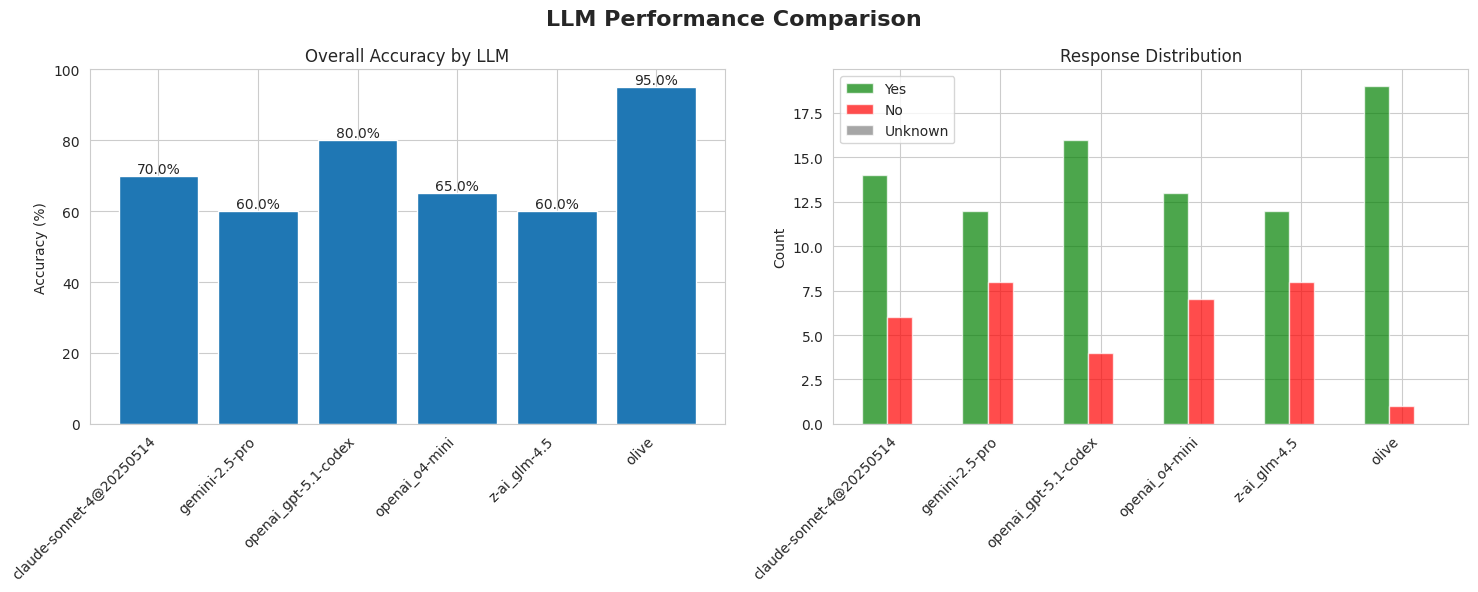


Comparison plot saved as 'llm_comparison.png'


In [ ]:
plot_comparison(results_df)